In [1]:
# Write your imports here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

# Regression Models Lab
## Linear and logistic regression: theory and practice

In this lab you'll revisit and expand on your knowledge of modelling in general, as well as the fundamentals of linear and logistic regression. As a reminder, _linear regression_ is a regression model (regressor), and _logistic regression_ is a classification model (classifier).

This time, you'll use generated data, in order to separate some of the complexity of handling various datasets from inspecting and evaluating models.

**Use vectorization as much as possible!** You should be able to complete the lab using for-loops only to track the training steps.

### Problem 1. Generate some data for multiple linear regression (1 point)
As an expansion to the lecture, you'll create a dataset and a model.

Create a dataset of some (e.g., 50-500) observations of several (e.g., 5-20) independent features. You can use random generators for them; think about what distributions you'd like to use. Let's call them $x_1, x_2, ..., x_m$. The data matrix $X$ you should get should be of size $n \times m$. It's best if all features have different ranges.

Create the dependent variable by assigning coefficients $\bar{a_1}, \bar{a_2}, ..., \bar{a_m}, \bar{b}$ and calculating $y$ as a linear combination of the input features. Add some random noise to the functional values. I've used bars over coefficients to avoid confusion with the model parameters later.

Save the dataset ($X$ and $y$), and "forget" that the coefficients have ever existed. "All" you have is the file and the implicit assumption that there is a linear relationship between $X$ and $y$.

Lets generate a dataset with 8 features with different ranges and 150 observations.

In [6]:
random_data = {
    "x1": np.random.uniform(0, 10, 150),
    "x2": np.random.uniform(10, 20, 150),
    "x3": np.random.uniform(30, 40, 150),
    "x4": np.random.uniform(55, 65, 150),
    "x5": np.random.uniform(80, 90, 150),
    "x6": np.random.uniform(100, 120, 150),
    "x7": np.random.uniform(1, 5, 150),
    "x8": np.random.uniform(8, 18, 150),
}

dataframe = pd.DataFrame(random_data)
X = dataframe.to_numpy()

In [7]:
coefficients = np.random.uniform(0.1, 2, dataframe.shape[1])  # Random coefficients for each feature
intercept = np.random.uniform(-10, 10)      # Random intercept

y = X @ coefficients + intercept  # Linear combination
noise = np.random.normal(0, 1, len(y))  # Gaussian noise
y += noise  # Add noise to the dependent variable
dataframe["y"] = y

Now lets assign the coefficients to create the dependant variable **y**:

In [9]:
#Save the data
dataframe.to_csv("Data.csv")

### Problem 2. Check your assumption (1 point)
Read the dataset you just saved (this is just to simulate starting a new project). It's a good idea to test and verify our assumptions. Find a way to check whether there really is a linear relationship between the features and output.

In [11]:
data = pd.read_csv("Data.csv")
data = data.drop("Unnamed: 0", axis = 1)

In [12]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,8.983175,11.119519,31.644379,55.612076,82.978737,111.288894,1.324517,9.761604,304.783158
1,0.756106,10.123252,34.025706,55.799984,84.614972,108.295057,4.689011,13.795974,315.802323
2,9.853256,19.753914,30.989899,55.063984,88.013038,108.997951,2.893049,10.016994,324.023180
3,6.400647,13.021074,36.186392,62.273241,82.712962,115.288070,2.323945,9.312598,317.223520
4,5.577865,12.809256,31.486220,56.513654,86.755525,115.076143,1.452586,10.435883,316.267899
...,...,...,...,...,...,...,...,...,...
145,4.960001,12.608122,37.029973,63.641925,88.177384,112.847474,3.231864,8.987568,328.664931
146,5.545252,17.657395,37.571635,61.764769,84.682331,111.634850,1.959012,8.761269,322.305376
147,7.889568,19.169005,31.980991,57.089561,82.688990,101.191719,4.342230,15.764824,323.626763
148,1.101560,19.429616,30.363917,56.933600,81.061598,107.394784,1.154013,15.279846,311.818751


To display the correlation between the features and the variable **y**, I will find the sum of all the features and plot it with the variable.

In [14]:
features_sum = data.loc[:, data.columns != 'y'].sum(axis=1)

Text(0, 0.5, 'y')

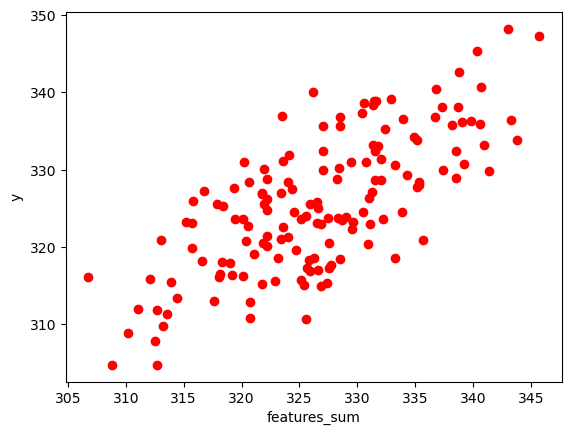

In [15]:
plt.scatter(features_sum, data.y, color = "red")
plt.xlabel("features_sum")
plt.ylabel("y")

There does seem to be a strong correlation between the features and the **y** variable.

### Problem 3. Figure out the modelling function (1 point)
The modelling function for linear regression is of the form
$$ \tilde{y} = \sum_{i=1}^{m}a_i x_i + b $$

If you want to be clever, you can find a way to represent $b$ in the same way as the other coefficients.

Write a Python function which accepts coefficients and data, and ensure (test) it works correctly.

In [111]:
features = data.iloc[:, :-1].to_numpy() #Extract the columns with features
y = data.iloc[:, -1].to_numpy() #Extract the column with the dependant variable

In [113]:
def modelling_function(coefficients, features, y):
    """The function takes a dataframe with the features and the y variable and a list of coefficients with the number of 
    features plus 1 - the last one being for the b value.
    It returns a tuple of the y values and the predicted y values
    """
    predictions = np.sum(features * coefficients[:-1], axis = 1) + coefficients[-1] #Calculate the predicted y
    return y, predictions

In [115]:
coeffs = [1,2,1,1.3,1,1.2,1,1.5,5] #Random coefficients
model_vs_actual = modelling_function(coeffs, features, y)
model_vs_actual #We get two numpy arrays containing the actual values of y versus the ones calculated via the given coefficients.

(array([304.7831585 , 315.80232327, 324.02318027, 317.22351953,
        316.26789895, 320.35059256, 329.31184337, 323.01230293,
        320.90992658, 345.35834889, 327.65959616, 315.75644876,
        318.45111713, 324.51297641, 327.77887924, 307.89353047,
        325.5947341 , 309.8371618 , 318.51015496, 332.4285459 ,
        328.46179703, 324.54199604, 328.37000359, 324.81968347,
        318.59914411, 317.24982426, 321.42738755, 327.95033107,
        333.1614354 , 315.10884239, 317.63148601, 323.21068463,
        325.61255625, 311.99489417, 330.08459455, 326.35926781,
        330.98704847, 347.24842351, 321.30619237, 330.96928589,
        325.99562747, 318.1553013 , 336.79142226, 333.23779348,
        325.87753217, 318.01974969, 322.73953716, 338.1516774 ,
        315.61427294, 323.80899733, 338.60124677, 332.38212711,
        316.35643637, 336.225693  , 316.11812846, 331.89424269,
        312.99232151, 322.58590666, 310.65889256, 330.76283339,
        316.92476291, 315.4903092 , 348.

### Problem 4. Write the cost function and compute its gradients (1 point)
Use MSE as the cost function $J$. Find a way to compute, calculate, or derive its gradients w.r.t. the model parameters $a_1, ..., a_m, b$

Note that computing the cost function value and its gradients are two separate operations. Quick reminder: use vectorization to compute all gradients (maybe with the exception of $\frac{\partial J}{\partial b}$) at the same time.

In [117]:
def cost_function(coefficients, features, y):
    model_vs_actual = modelling_function(coefficients, features, y)
    values = model_vs_actual[0]
    model = model_vs_actual[1]
    distances = (values - model) ** 2 #Get the distances, emphasizing on the larger errors, by squaring the result
    avg_error = np.mean(distances)
    return avg_error

In [119]:
J = cost_function(coeffs, features, y)
J

4660.555156078077

In [121]:
def compute_gradient(features, y, a, b, learning_rate):
    predictions = np.dot(features, a) + b
    error = y - predictions
    a_gradient = -2 / len(features) * np.dot(features.T, error) #Calculate gradient for coefficients
    b_gradient = -2 / len(features) * np.sum(error) #Intercept gradient
    new_a = a - a_gradient * learning_rate
    new_b = b - b_gradient * learning_rate
    return new_a, new_b

### Problem 5. Perform gradient descent (1 point)
Perform weight updates iteratively. Find a useful criterion for stopping. For most cases, just using a fixed (large) number of steps is enough.

You'll need to set a starting point (think about which one should be good, and how it matters); and a learning rate.

In [123]:
coeffs #These are the values I gave to the coefficients earlier.

[1, 2, 1, 1.3, 1, 1.2, 1, 1.5, 5]

In [125]:
model_a = np.array(coeffs[:-1]) #Get the coefficients
model_b = coeffs[-1] #Get the intercept
rate = 0.00001 #This will be the learning rate

In [127]:
for i in range(1001):
    model_a, model_b = compute_gradient(features, y, model_a, model_b, rate)
    new_coeffs = np.hstack((model_a, model_b)) #Combine the feature coefficients with the intercept
    if i % 100 == 0: #Print the result every 100 steps
        error = cost_function(new_coeffs, features, y)
        print("Step {}: a = {}, b = {}, J = {}".format(i, model_a, model_b, error))
print("Final line: {} * x + {}".format(model_a, model_b)) 

Step 0: a = [0.99330053 1.97914629 0.95285587 1.21822418 0.88440208 1.04918752
 0.99602937 1.4828625 ], b = 4.998642596091235, J = 1216.0754140109375
Step 100: a = [0.97931727 1.94166961 0.90469552 1.14971701 0.79641198 0.86784698
 0.99540704 1.46692853], b = 4.997359454615568, J = 41.77571947964968
Step 200: a = [0.97228523 1.92535436 0.90402869 1.16384207 0.82509743 0.84059199
 0.99878448 1.46824071], b = 4.997450729242651, J = 39.68141267883662
Step 300: a = [0.96546642 1.90919219 0.90299805 1.17742007 0.85279235 0.81450148
 1.00209661 1.46938868], b = 4.997537081104089, J = 37.728367312808864
Step 400: a = [0.95885231 1.89318536 0.90162372 1.19047383 0.87953648 0.78952498
 1.00534617 1.4703823 ], b = 4.997618736019583, J = 35.9055878568353
Step 500: a = [0.95243477 1.87733586 0.89992489 1.20302519 0.90536786 0.76561425
 1.00853573 1.4712309 ], b = 4.997695909757067, J = 34.2029866711949
Step 600: a = [0.946206   1.86164545 0.89791989 1.21509506 0.93032293 0.74272315
 1.01166778 1.4

### Problem 6. Do other cost functions work? (2 points)
Repeat the process in problems 4 and 5 with MAE, and then again - with the [Huber loss](https://en.wikipedia.org/wiki/Huber_loss). Both of them are less sensitive to outliers / anomalies than MSE); with the Huber loss function being specifically made for datasets with outliers.

Explain your findings. Is there a cost function that works much better? How about speed of training (measured in wall time)?

Compute linear regression for MAE:

In [129]:
def cost_function_MAE(coefficients, features, y):
    model_vs_actual = modelling_function(coefficients, features, y)
    values = model_vs_actual[0]
    model = model_vs_actual[1]
    distances = np.abs(values - model) #Get the distances, emphasizing on the larger errors, by squaring the result
    avg_error = np.mean(distances)
    return avg_error

In [131]:
for i in range(1001):
    model_a, model_b = compute_gradient(features, y, model_a, model_b, rate)
    new_coeffs = np.hstack((model_a, model_b)) #Combine the feature coefficients with the intercept
    if i % 100 == 0: #Print the result every 100 steps
        error = cost_function_MAE(new_coeffs, features, y)
        print("Step {}: a = {}, b = {}, J = {}".format(i, model_a, model_b, error))
print("Final line: {} * x + {}".format(model_a, model_b)) 

Step 0: a = [0.92297991 1.80035314 0.88714411 1.25904832 1.02227024 0.66031237
 1.02369556 1.47359671], b = 4.998022022717538, J = 4.227636347970742
Step 100: a = [0.91759117 1.78547906 0.88385272 1.26899033 1.04333143 0.64190251
 1.02657299 1.47374605], b = 4.99807629807281, J = 4.1350384659791475
Step 200: a = [0.91235108 1.77077046 0.88034882 1.27855887 1.06370499 0.62427431
 1.02940561 1.47380397], b = 4.998127357547805, J = 4.046174318876512
Step 300: a = [0.90725396 1.75622777 0.87664558 1.28776932 1.08341782 0.60739399
 1.03219521 1.47377663], b = 4.998175350834884, J = 3.9614005749852974
Step 400: a = [0.90229437 1.74185129 0.87275554 1.29663641 1.10249572 0.59122923
 1.03494351 1.47366987], b = 4.9982204209295364, J = 3.879440364158713
Step 500: a = [0.8974671  1.7276412  0.86869066 1.30517421 1.12096337 0.57574915
 1.03765214 1.47348923], b = 4.998262704425832, J = 3.7999567009406845
Step 600: a = [0.89276717 1.71359752 0.86446236 1.31339623 1.13884443 0.56092417
 1.04032267 

Compute linear regression with the Hubber loss function:

In [133]:
delta = 1.0 #Hubber loss threshold

def cost_function_Hubber_loss(coefficients, features, y, delta):
    model_vs_actual = modelling_function(coefficients, features, y)
    values = model_vs_actual[0]
    model = model_vs_actual[1]
    residual = values - model
    loss = np.where(np.abs(residual) <= delta,  # Condition
                    0.5 * residual ** 2,        # MSE part (quadratic)
                    delta * (np.abs(residual) - 0.5 * delta))  # MAE part (linear)
    return np.mean(loss)

In [135]:
for i in range(1001):
    model_a, model_b = compute_gradient(features, y, model_a, model_b, rate)
    new_coeffs = np.hstack((model_a, model_b)) #Combine the feature coefficients with the intercept
    if i % 100 == 0: #Print the result every 100 steps
        error = cost_function_Hubber_loss(new_coeffs, features, y, delta)
        print("Step {}: a = {}, b = {}, J = {}".format(i, model_a, model_b, error))
print("Final line: {} * x + {}".format(model_a, model_b)) 

Step 0: a = [0.87510689 1.65895056 0.84607639 1.3434461  1.20509727 0.50750596
 1.05067779 1.47164699], b = 4.998436981438237, J = 2.9810154362977292
Step 100: a = [0.87097728 1.64573708 0.84118302 1.35026972 1.22036231 0.49556137
 1.0531786  1.47112356], b = 4.9984650690617505, J = 2.9191950187277182
Step 200: a = [0.86694933 1.63268789 0.83618431 1.35684735 1.2351635  0.48411944
 1.05564931 1.47055764], b = 4.998491170207762, J = 2.8595642373059666
Step 300: a = [0.86301938 1.6198023  0.83108838 1.36318892 1.24951838 0.47315852
 1.05809108 1.4699528 ], b = 4.998515379409474, J = 2.802000164295804
Step 400: a = [0.85918393 1.60707956 0.82590294 1.36930396 1.26344375 0.46265791
 1.06050498 1.46931242], b = 4.998537786939485, J = 2.746360129318786
Step 500: a = [0.85543966 1.59451883 0.82063537 1.37520159 1.27695574 0.45259779
 1.06289203 1.46863966], b = 4.998558478998264, J = 2.692560119378882
Step 600: a = [0.85178334 1.58211921 0.81529267 1.38089055 1.29006978 0.44295923
 1.06525324

### Problem 7. Experiment with the learning rate (1 point)
Use your favorite cost function. Run several "experiments" with different learning rates. Try really small, and really large values. Observe and document your findings.

### Problem 8. Generate some data for classification (1 point)
You'll need to create two clusters of points (one cluster for each class). I recomment using `scikit-learn`'s `make_blobs()` ([info](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)). Use as many features as you used in problem 1.

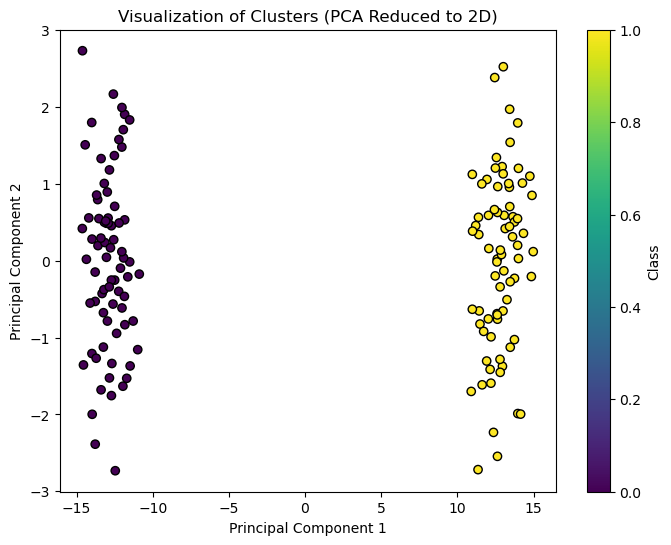

In [38]:
X, y = make_blobs(n_samples=150, centers=2, n_features=8, random_state=42) # X contains the 8 features, y contains the class labels (0 or 1)
 
# Step 2: Reduce dimensions for visualization using PCA (from 8D to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 3: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Visualization of Clusters (PCA Reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class")
plt.show()

### Problem 9. Perform logistic regression (1 point)
Reuse the code you wrote in problems 3-7 as much as possible. If you wrote vectorized functions with variable parameters - you should find this easy. If not - it's not too late to go back and refactor your code.

The modelling function for logistic regression is
$$ \tilde{y} = \frac{1}{1+\exp{(-\sum_{i=1}^{m}a_i x_i + b)}}$$. Find a way to represent it using as much of your previous code as you can.

The most commonly used loss function is the [cross-entropy](https://en.wikipedia.org/wiki/Cross-entropy).

Experiment with different learning rates, basically repeating what you did in problem 7.

In [40]:
y = y.reshape(-1, 1)  # Reshape y to be a column vector

m = X.shape[1]  # Number of features
a = np.random.randn(m, 1)  # Weights (coefficients)
b = 0  # Bias (intercept)
learning_rate = 0.01
n_iterations = 1000

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent Loop
for _ in range(n_iterations):
    # Linear combination: z = X @ a + b
    z = np.dot(X, a) + b
    y_pred = sigmoid(z)

    # Calculate Loss (Binary Cross-Entropy)
    loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    # Calculate Gradients
    dz = y_pred - y
    da = np.dot(X.T, dz) / y.shape[0]  # Gradient w.r.t. weights
    db = np.mean(dz)                   # Gradient w.r.t. bias

    # Update Parameters
    a -= learning_rate * da
    b -= learning_rate * db

    # Print Loss every 100 iterations
    if _ % 100 == 0:
        print(f"Iteration {_}, Loss: {loss:.4f}")

# Prediction Function
def predict(X):
    z = np.dot(X, a) + b
    return sigmoid(z) >= 0.5  # Classify as 1 if probability >= 0.5

# Evaluate Accuracy
y_pred = predict(X)
accuracy = np.mean(y_pred == y) * 100
print(f"Model accuracy: {accuracy:.2f}%")

Iteration 0, Loss: 12.5468
Iteration 100, Loss: 0.0048
Iteration 200, Loss: 0.0019
Iteration 300, Loss: 0.0012
Iteration 400, Loss: 0.0008
Iteration 500, Loss: 0.0007
Iteration 600, Loss: 0.0005
Iteration 700, Loss: 0.0005
Iteration 800, Loss: 0.0004
Iteration 900, Loss: 0.0003
Model accuracy: 100.00%


### * Problem 10. Continue experimenting and delving deep into ML
You just saw how modelling works and how to implement some code. Some of the things you can think about (and I recommend you pause and ponder on some of them are):
* Code: OOP can be your friend sometimes. `scikit-learn`'s models have `fit()`, `predict()` and `score()` methods.
* Data: What approaches work on non-generated data?
* Evaluation: How well do different models (and their "settings" - hyperparameters) actually work in practice? How do we evaluate a model in a meaningful way?
* Optimization - maths: Look at what `optimizers` (or solvers) are used in `scikit-learn` and why. Many "tricks" revolve around making the algorithm converge (finish) in fewer iterations, or making it more numerically stable.
* Optimization - code: Are there ways to make the code run fastr?